In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

## Step 1: Read and process the data

* These training data are from the same ant dataset we used for support vector machines.
* The response/label/Y variable is species.
* The features are morphological measurements from the ants.

We take the following steps:
1. Read the data using the function read_csv.
2. Extract some labels that we will use later for plotting.
3. Drop columns from the dataframe that we don't want to use for modeling. 

In [2]:
# load ants dataset
dataframe = pd.read_csv('all_measurments2020x09.csv')

# get X and Y 
Y = dataframe['species']
Y2 = dataframe['caste']
combined_label = Y.astype(str) + '_' + Y2.astype(str)
X = dataframe.drop(['species','caste', 'country', 'comment', 'bc_num', 'coll_code'], axis=1)

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 2: Fit the PCA and transform the data.

Now, we are ready to fit the PCA and project our data onto its axes.

In [14]:
# fit the PCA
pca = PCA()
pca.fit(X_scaled)

# project the data.
X_pca = pca.transform(X_scaled)

15


## Step 3: Plot the principal components and loadings.

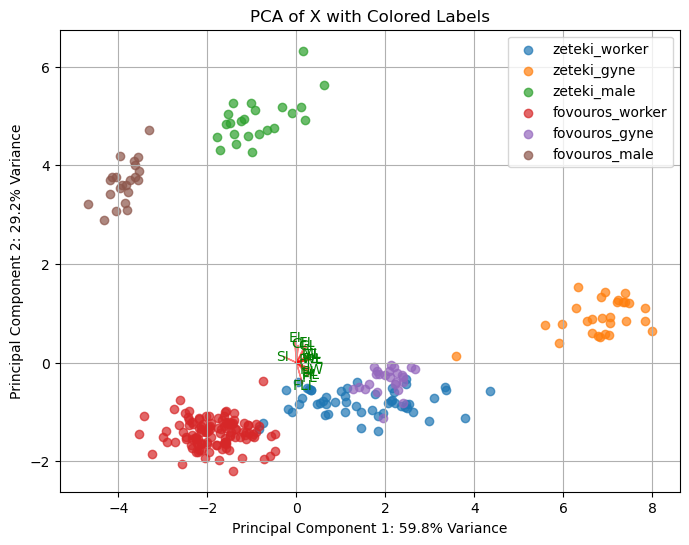

In [13]:
# calculate percent variance
explained_variance_pc1 = np.round(pca.explained_variance_ratio_[0] * 100,1)
explained_variance_pc2 = np.round(pca.explained_variance_ratio_[1] * 100,1)


# create a scatter plot colored by combined labels
plt.figure(figsize=(8, 6))
for label in combined_label.unique():
    plt.scatter(X_pca[combined_label == label, 0], X_pca[combined_label == label, 1], label=label, alpha=0.7)

# plot variable loadings as arrows
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, feature, color='g', ha='center', va='center')

plt.title('PCA of X with Colored Labels')
plt.xlabel(f'Principal Component 1: {explained_variance_pc1}% Variance')
plt.ylabel(f'Principal Component 2: {explained_variance_pc2}% Variance')
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Plot the Eigenvalues

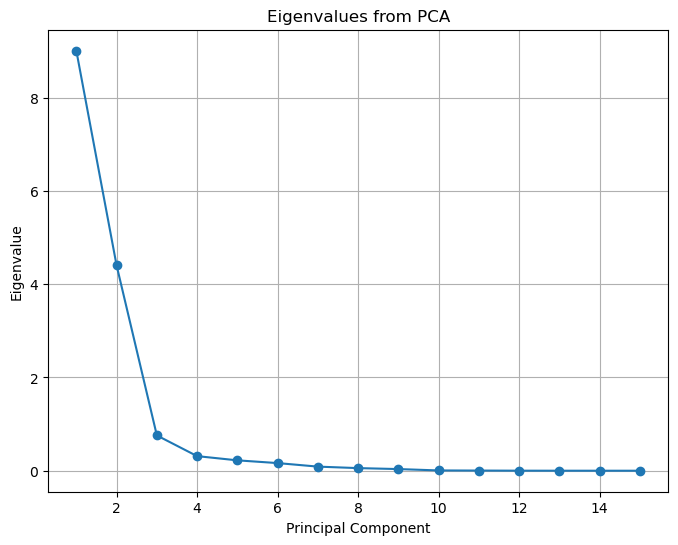

In [5]:
# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Eigenvalues from PCA')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

## Step 5: Plot other Axes

**Add**: Given the above, there is probably useful information in the third component. Copy and modify the code from Step 3 to plot the second axis against the third axis

**hint**:  In this code: plt.scatter(X_pca[combined_label == label, 0], X_pca[combined_label == label, 1], label=label, alpha=0.7), the 0 and the 1 tell python to plot the axis at the 0 index and the 1 index (i.e., axes 1 and 2). 

**hint**: Also change the axes being used when plotting the loadings.


In [6]:
## code goes here.


## Step 6: Kmeans clustering on the raw data.

Now, we will perform k-means clustering on the raw data.

Then, we plot the inertia (look up what this is: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

We can use this to select the appopriate value of k.

/usr/local/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

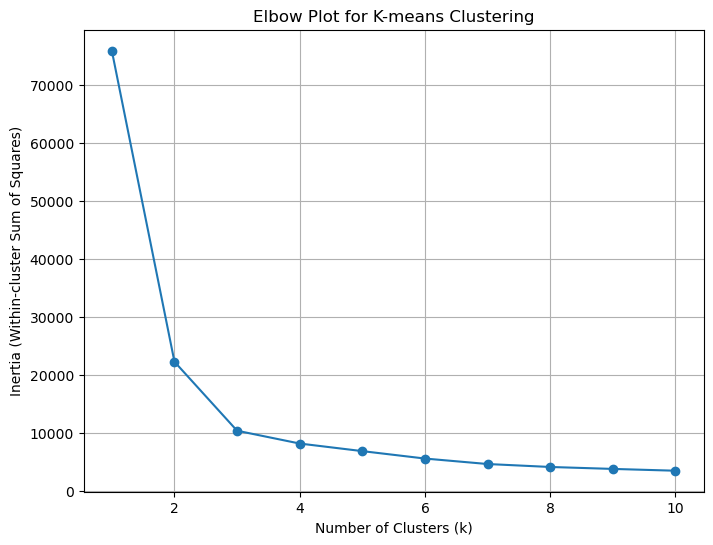

In [7]:
# Define the range of cluster numbers to explore
cluster_range = range(1, 11)  # You can adjust the range as needed

# Initialize a list to store the inertia (within-cluster sum of squares)
inertia_list = []

# Perform K-means clustering for each k in the cluster range
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

##  Step 7: Select the appropriate K and plot it.

Based on the elbow plot above, choose a value of K and plot it using the below code. We plot agains the Principal Component axes to facilitate visualization.

/usr/local/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Principal Component 2')

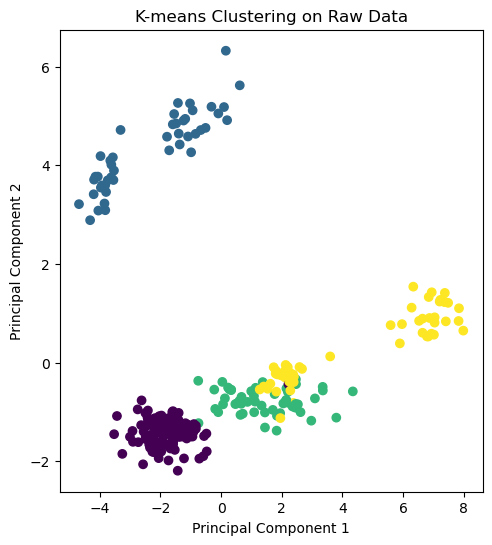

In [8]:
selected_k = 4
kmeans_raw = KMeans(n_clusters=selected_k)
clusters_raw = kmeans_raw.fit_predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_raw, cmap='viridis')
plt.title('K-means Clustering on Raw Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## Step 8: Try k-mediods clustering.

Now, we will try PAM or k-mediods clustering.

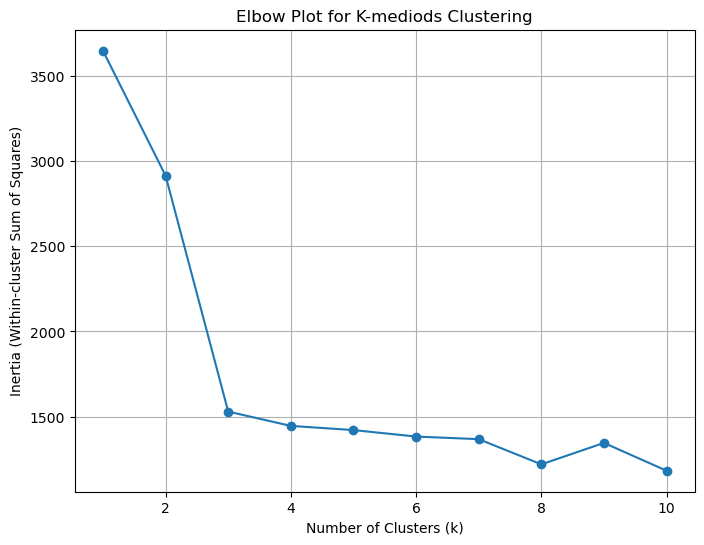

In [9]:
# Define the range of cluster numbers to explore
cluster_range = range(1, 11)  # You can adjust the range as needed

# Initialize a list to store the inertia (within-cluster sum of squares)
pam_inertia_list = []

# Perform K-means clustering for each k in the cluster range
for k in cluster_range:
    pam = KMedoids(n_clusters=k)
    pam.fit(X)
    pam_inertia_list.append(pam.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, pam_inertia_list, marker='o')
plt.title('Elbow Plot for K-mediods Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

## Step 9: Choose a k and plot results.

Text(0, 0.5, 'Principal Component 2')

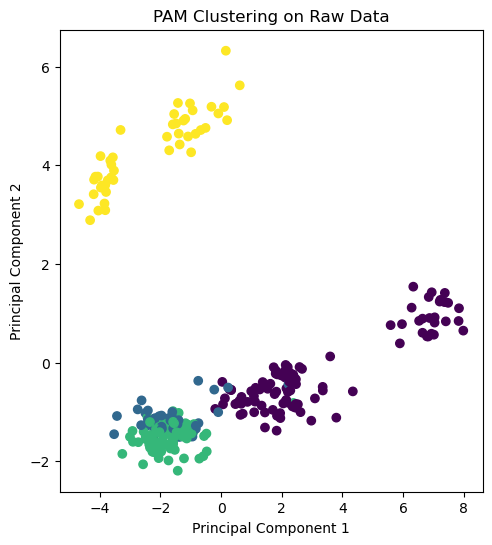

In [11]:

selected_k = 4
# Step 1: Cluster the raw data using PAM
pam_raw = KMedoids(n_clusters=selected_k)
clusters_raw_pam = pam_raw.fit_predict(X)


# Step 3: Visualize the clustering results
# Plot for raw data clustering using PAM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_raw_pam, cmap='viridis')
plt.title('PAM Clustering on Raw Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


## 6990 Only: Step 10

Perform either k-means or PAM clustering using some PC axes instead of the raw data. Decide how many PC axes to keep based on the eigenvalues (plotted above.)